# FAKE NEWS DETECTION

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

In [2]:
df_true=pd.read_csv("D:\\CodeClause\\True.csv")
df_fake=pd.read_csv("D:\\CodeClause\\Fake.csv")

In [3]:
df_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [4]:
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


### DATA EXPLORATION AND PRE-PROCESSING

In [5]:
#Creating the target column 
df_true["label"]=0
df_fake["label"]=1
print(df_true.shape,df_fake.shape)
df_true.drop_duplicates(inplace=True)
df_fake.drop_duplicates(inplace=True)

(21417, 5) (23481, 5)


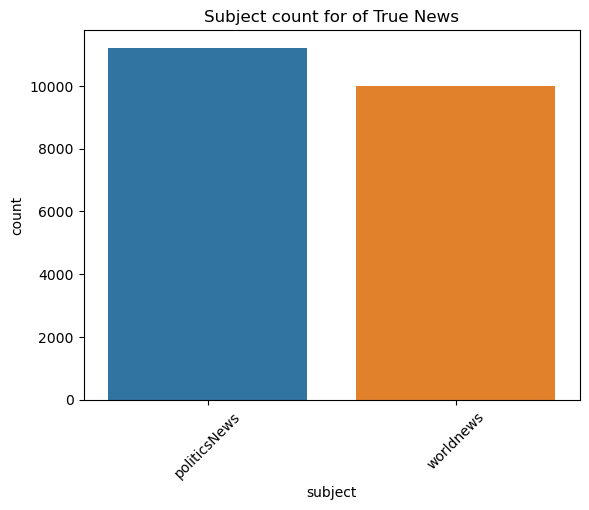

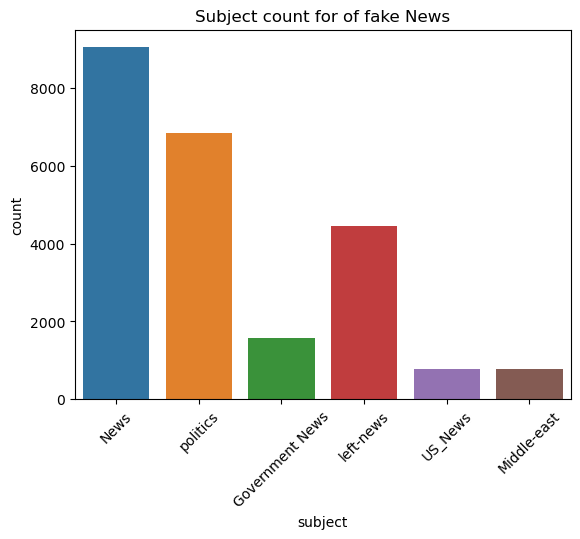

In [6]:
sns.countplot(x='subject', data=df_true)
plt.title("Subject count for of True News")
plt.xticks(rotation=45)
plt.show()
sns.countplot(x='subject', data=df_fake)
plt.title("Subject count for of fake News")
plt.xticks(rotation=45)
plt.show()

In [7]:
#merge fake and real news data into a single dataframe
merged_data=pd.merge(df_true,df_fake,on=list(df_true.columns),how='outer')
#to shuffle the data so there is no bias while splitting the data
merged_data=merged_data.sample(frac=1).reset_index(drop=True)
merged_data

,title,text,subject,date,label
0,Republican Stuns In Brutally Honest Reaction ...,With the unveiling of the Senate Republicans ...,News,"June 24, 2017",1
1,Pentagon's Mattis again seeks to reassure U.S....,WASHINGTON (Reuters) - Defense Secretary Jim M...,politicsNews,"August 19, 2017",0
2,Huge Progressive Group Demands Debbie Wasserm...,Democratic National Committee Chairwoman Rep. ...,News,"January 7, 2016",1
3,Russians talked about influencing Trump throug...,WASHINGTON (Reuters) - U.S. spies learned last...,politicsNews,"May 24, 2017",0
4,Whoopi Goldberg FURIOUS Over Trump’s John Lew...,As the majority of Americans are completely de...,News,"January 17, 2017",1
...,...,...,...,...,...
44684,Merkel's Social Democrat rival bullish ahead o...,BERLIN (Reuters) - German Social Democrat (SPD...,worldnews,"September 1, 2017",0
44685,Over Half Of The 23 NFL Players Still Kneeling...,Are you one bit surprised by the fact that the...,left-news,"Dec 18, 2017",1
44686,WOW! TUCKER CARLSON TAKES ON OBAMACARE ARCHITE...,,Government News,"Jan 26, 2017",1
44687,THE HUNT IS ON: How Trump Team Is Smoking Out ...,President Trump has made it clear that he will...,Government News,"Feb 18, 2017",1


([<matplotlib.axis.XTick at 0x27e84cfa700>,
 [Text(0, 0, 'True'), Text(1, 0, 'Fake')])

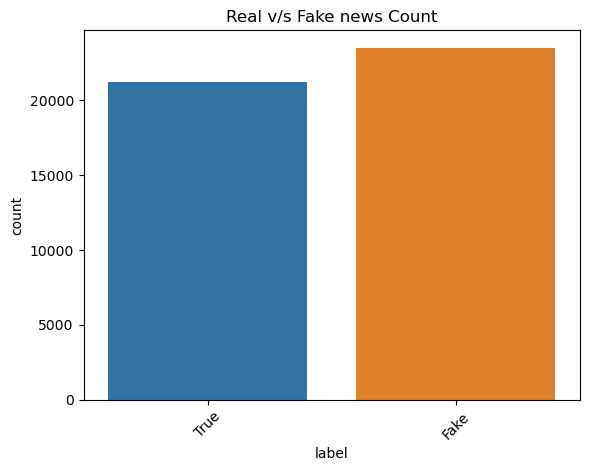

In [8]:
sns.countplot(x='label', data=merged_data)
plt.title("Real v/s Fake news Count")
plt.xticks(rotation=45,ticks=range(0,2),labels=["True","Fake"])

In [9]:
merged_data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [10]:
merged_data['news']=merged_data['subject']+' '+merged_data['title']+' '+merged_data['text']
merged_data['news'] = merged_data.apply(lambda x: x['news'].lower(),axis=1)
merged_data

,title,text,subject,date,label,news
0,Republican Stuns In Brutally Honest Reaction ...,With the unveiling of the Senate Republicans ...,News,"June 24, 2017",1,news republican stuns in brutally honest reac...
1,Pentagon's Mattis again seeks to reassure U.S....,WASHINGTON (Reuters) - Defense Secretary Jim M...,politicsNews,"August 19, 2017",0,politicsnews pentagon's mattis again seeks to ...
2,Huge Progressive Group Demands Debbie Wasserm...,Democratic National Committee Chairwoman Rep. ...,News,"January 7, 2016",1,news huge progressive group demands debbie wa...
3,Russians talked about influencing Trump throug...,WASHINGTON (Reuters) - U.S. spies learned last...,politicsNews,"May 24, 2017",0,politicsnews russians talked about influencing...
4,Whoopi Goldberg FURIOUS Over Trump’s John Lew...,As the majority of Americans are completely de...,News,"January 17, 2017",1,news whoopi goldberg furious over trump’s joh...
...,...,...,...,...,...,...
44684,Merkel's Social Democrat rival bullish ahead o...,BERLIN (Reuters) - German Social Democrat (SPD...,worldnews,"September 1, 2017",0,worldnews merkel's social democrat rival bulli...
44685,Over Half Of The 23 NFL Players Still Kneeling...,Are you one bit surprised by the fact that the...,left-news,"Dec 18, 2017",1,left-news over half of the 23 nfl players stil...
44686,WOW! TUCKER CARLSON TAKES ON OBAMACARE ARCHITE...,,Government News,"Jan 26, 2017",1,government news wow! tucker carlson takes on o...
44687,THE HUNT IS ON: How Trump Team Is Smoking Out ...,President Trump has made it clear that he will...,Government News,"Feb 18, 2017",1,government news the hunt is on: how trump team...


In [11]:
#removing numbers,characters and english stopwords from the news
stop_words = set(stopwords.words('english'))
def preprocess(text):
    text=re.sub(r'[^A-z\s]', '',text).lower()
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    filtered_text = " ".join(filtered_tokens)
    return filtered_text
merged_data['cleaned_news']=merged_data.news.apply(preprocess)
merged_data

,title,text,subject,date,label,news,cleaned_news
0,Republican Stuns In Brutally Honest Reaction ...,With the unveiling of the Senate Republicans ...,News,"June 24, 2017",1,news republican stuns in brutally honest reac...,news republican stuns brutally honest reaction...
1,Pentagon's Mattis again seeks to reassure U.S....,WASHINGTON (Reuters) - Defense Secretary Jim M...,politicsNews,"August 19, 2017",0,politicsnews pentagon's mattis again seeks to ...,politicsnews pentagons mattis seeks reassure u...
2,Huge Progressive Group Demands Debbie Wasserm...,Democratic National Committee Chairwoman Rep. ...,News,"January 7, 2016",1,news huge progressive group demands debbie wa...,news huge progressive group demands debbie was...
3,Russians talked about influencing Trump throug...,WASHINGTON (Reuters) - U.S. spies learned last...,politicsNews,"May 24, 2017",0,politicsnews russians talked about influencing...,politicsnews russians talked influencing trump...
4,Whoopi Goldberg FURIOUS Over Trump’s John Lew...,As the majority of Americans are completely de...,News,"January 17, 2017",1,news whoopi goldberg furious over trump’s joh...,news whoopi goldberg furious trumps john lewis...
...,...,...,...,...,...,...,...
44684,Merkel's Social Democrat rival bullish ahead o...,BERLIN (Reuters) - German Social Democrat (SPD...,worldnews,"September 1, 2017",0,worldnews merkel's social democrat rival bulli...,worldnews merkels social democrat rival bullis...
44685,Over Half Of The 23 NFL Players Still Kneeling...,Are you one bit surprised by the fact that the...,left-news,"Dec 18, 2017",1,left-news over half of the 23 nfl players stil...,leftnews half nfl players still kneeling natio...
44686,WOW! TUCKER CARLSON TAKES ON OBAMACARE ARCHITE...,,Government News,"Jan 26, 2017",1,government news wow! tucker carlson takes on o...,government news wow tucker carlson takes obama...
44687,THE HUNT IS ON: How Trump Team Is Smoking Out ...,President Trump has made it clear that he will...,Government News,"Feb 18, 2017",1,government news the hunt is on: how trump team...,government news hunt trump team smoking leaker...


<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

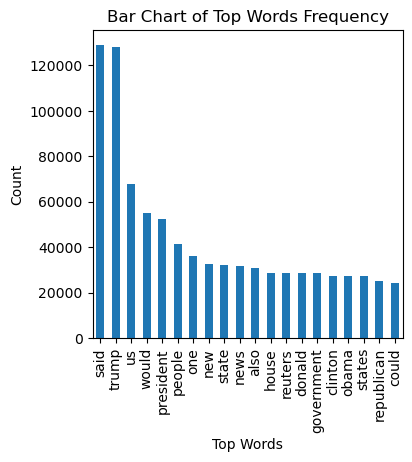

In [12]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]
  
  
common_words = get_top_n_words(merged_data['cleaned_news'], 20)
df1 = pd.DataFrame(common_words, columns=['News', 'count'])
  
df1.groupby('News').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(4, 4),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

### MODELLING 

In [13]:
x = merged_data["cleaned_news"]
y = merged_data["label"]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB

  
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.4)

In [15]:
#converting the string to a vector using Term Frequency Inverse Document Frequency(TF-IDF)
vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [21]:
#Naive Bayes classifier
bnb = BernoulliNB()
bnb.fit(x_train,y_train)


# testing the model

print(accuracy_score(y_test, bnb.predict(x_test)))

0.9790780935332289


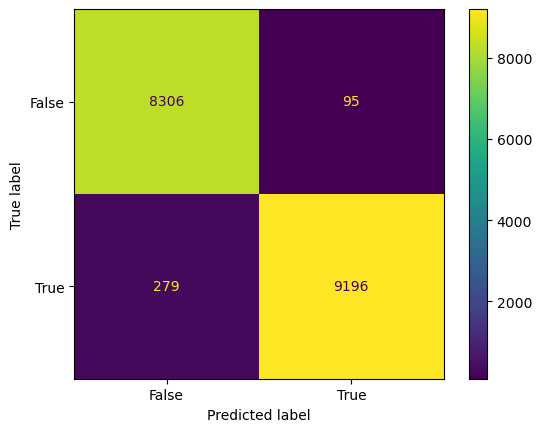

In [22]:
 #Confusion matrix of Results from Naive Bayes classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, bnb.predict(x_test))
  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])
  
cm_display.plot()
plt.show()

### MANUAL TESTING

In [18]:
def output_label(n):
    if n == 1:
        return "Fake News"
    elif n == 0:
        return "Not A Fake News"
def testing(news):
    testing_news = {"text":[news]}
    
    new_xv_test = vectorization.transform(testing_news["text"])
    pred_bnb = bnb.predict(new_xv_test)
    return print("\n naive bayes Prediction: {}".format(output_label((pred_bnb))))

In [19]:
# FAKE NEWS
fake="""Donald Trump s White House is in chaos, and they are trying to cover it up. Their Russia problems are mounting by 
the hour, and they refuse to acknowledge that there are problems surrounding all of this. To them, it s  fake news,  or a
hoax.  However, the facts bear things out differently, and it seems that there are now cracks in the Congressional public 
leadership.Chuck Grassley (R-Iowa), who heads the Senate Judiciary Committee, is fed up. He is now demanding that Donald 
Trump, Jr. and former 2016 Trump Campaign Manager Paul Manafort testify before his committee regarding the now infamous shady
meeting between Donald Trump and the shady Russian lawyer who promised dirt on 2016 Democratic Presidential nominee Hillary 
Clinton. In fact, this information is due, well, NOW. This demand sends a few signals to team Trump   most notably that they
should not fire Special Counsel Robert Mueller under any circumstances, despite the fact that it seems that this seems to be 
what Trump s White House is laying the groundwork, so to speak, to do as we speak.Here is the tweet regarding Grassley s 
warning:Also, anyone who thinks that Senator Grassley and the rest of the Senate are not serious about this only needs to 
look at the warning that has already been given: Trump Jr. and Manafort will either follow orders, or be served with subpoenas
that force them to comply. If they refuse, they will be held in contempt of Congress, which carries with it serious jail time.
Even the cruel, craven creatures within the GOP are sick of Donald Trump s corruption and his scandal-ridden White House. 
They are angry that he staged a hostile takeover of their party, first with birtherism and giving them a permanently racist 
label all while decimating all efforts that were made to pretend the Republican Party isn t a hotbed of racism, and while 
turning their worlds upside down, and with it, the nation. It seems that old-timers like Grassley, who are clearly sick of
Trump s bullshit, just might be the ones who could save the republic. All they need is a bit of courage.Featured image via
Win McNamee/Getty Images"""
testing(fake)


 naive bayes Prediction: Fake News


In [20]:
#REAL NEWS
real="""WASHINGTON (Reuters) - A federal appeals court in Washington on Friday rejected a bid by President Donald Trumpâ€™s
administration to prevent the U.S. military from accepting transgender recruits starting Jan. 1, the second court to issue
such a ruling this week. Four federal judges around the country have issued injunctions blocking Trumpâ€™s ban on transgender 
people from the military, including one that was also handed down on Friday. The administration has appealed the previous three
rulings. In a six-page order, the three-judge-panel of the U.S. Court of Appeals for the District of Columbia Circuit said the
administration had â€œnot shown a strong likelihood that they will succeed on the merits of their challengeâ€ to a district
courtâ€™s order blocking the ban. On Thursday the Richmond, Virginia-based 4th U.S. Circuit Court of Appeals said it was 
denying the administrationâ€™s request while the appeal proceeds. The two courtsâ€™ actions could prompt the administration 
to ask the conservative-majority U.S. Supreme Court to intervene. Also on Friday, a federal trial court in Riverside,
California, blocked the ban while the case proceeds, making it the fourth to do so, after similar rulings in Baltimore, 
Seattle and Washington, D.C. U.S. District Judge Jesus Bernal said without the injunction the plaintiffs, including current
and aspiring service members, would suffer irreparable harm. â€œThere is nothing any court can do to remedy a government-sent 
message that some citizens are not worthy of the military uniform simply because of their gender,â€ he added. The administration 
had argued that the Jan. 1 deadline for accepting transgender recruits was problematic because tens of
thousands of personnel would have to be trained on the medical standards needed to process transgender a
pplicants, and the military was not ready for that. The Obama administration had set a deadline of July 1, 2017,
to begin accepting transgender recruits, but Trumpâ€™s defense secretary, James Mattis, postponed that date to Jan. 1. 
In an August memorandum, Trump gave the military until March 2018 to revert to a policy prohibiting openly transgender 
individuals from joining the military and authorizing their discharge. The memo also halted the use of government funds for 
sex-reassignment surgery for active-duty personnel. """
testing(real)


 naive bayes Prediction: Not A Fake News
